[1 0]


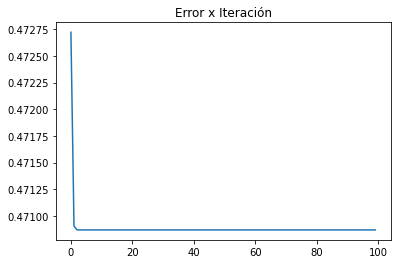

[ 1.70527539e+00 -2.95822839e-31]


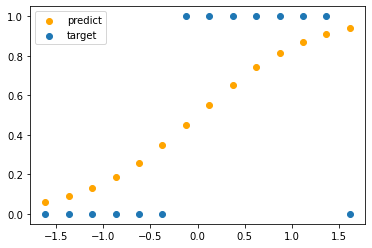

In [2]:
#Siempre comenzamos con un modelo
#En es este caso será: Regresión Logística
#Tiene una particularidad: El DECISION BOUNDARY
#que lo podemos modelar de forma lineal o polinómica
#Trabajaremos con modelo lineal:
#Para ajustar los parámetros y encontrar el mejor modelo
#usaremos la funcion costo
#En este caso es el LOG-LOSS function
#Pues la funciń MSE no nos perite usar descenso gradiente
import numpy as np
import matplotlib.pyplot as plt

X_train = np.arange(14)
Y_target = np.array([0,0,0,0,0,0,1,1,1,1,1,1,1,0])

def z_score_norm(X):
    return (X-np.mean(X))/np.std(X)

X_train=z_score_norm(X_train)

def l(z):
    return 1/(1+np.exp(-z))
def f(x,w,b):
    return np.dot(x,w)+b

#Función sigmoide
#lt.plot(np.arange(-20,20),list(map(l,np.arange(-20,20))))
#lt.show()

#Log-loss->asumiendo z lineal
def log_loss(W,b,y,X):
    Y=y[:,np.newaxis]
    ff = X[:,np.newaxis]@W[:,np.newaxis]+b
    ff = 1/(1+np.exp(-ff))
    return np.sum(-Y*np.log(ff)-(1-Y)*(np.log(1-ff)))/len(X)

def dJ(W,b,Y,X):
    ff = X[:,np.newaxis]@W[:,np.newaxis]+b
    ff = 1/(1+np.exp(-ff))-Y[:,np.newaxis]
    return np.sum(ff*np.c_[X,np.ones(len(X))],axis=0)/len(X)

def GDRegression(W,b,X,Y,it,alpha):
    pars = np.append(W,b)
    error=[]
    print(pars)
    for i in range(it):
        pars=pars-alpha*dJ(pars[:-1],pars[-1],Y,X)
        error.append(log_loss(pars[:-1],pars[-1],Y,X))
    plt.plot(np.arange(it),error)
    plt.title("Error x Iteración")
    plt.show()
    print(pars)
    return pars

pars = GDRegression(np.array([1]),0,X_train,Y_target,100,10)
W=pars[:-1]
b=pars[-1]

plt.scatter(X_train,1/(1+np.exp(-(X_train[:,np.newaxis]@W[:,np.newaxis]+b))),color='orange',label='predict')
plt.scatter(X_train,Y_target,label='target')
plt.legend()
plt.show()